In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as color
import numpy as np

: 

In [ ]:
ablty=20
coe=1+10/100

: 

: 

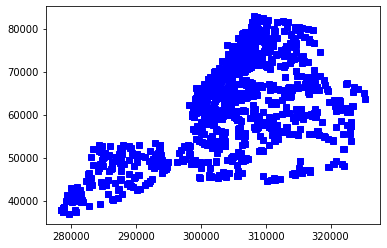

: 

: 

In [ ]:
# demandCoordinates = [(88, 16), (25, 76), (69, 13), (73, 56), (80, 100), (22, 92), (32, 84), (73, 46), (
#         29, 10), (92, 32), (44, 44), (55, 26), (71, 27), (51, 91), (89, 54), (43, 28), (40, 78), (60, 66)]
data=np.load("xy坐标.npy")
demandCoordinates=[(data[i][0],data[i][1]) for i in range(data.shape[0])]
size=data.shape[0]
q=[1 for i in range(size)]
p=300
for xy in demandCoordinates:
    plt.plot(xy[0],xy[1],c="b",marker="s")

In [ ]:
A=[(i,j) for i in range(size) for j in range(size)]
N=[i for i in range(size)]
dis={(i,j):np.hypot(demandCoordinates[i][0]-demandCoordinates[j][0],demandCoordinates[i][1]-demandCoordinates[j][1]) for i,j in A}

: 

: 

In [ ]:
from gurobipy import Model, GRB , quicksum

: 

: 

In [ ]:
mdl=Model("p-center")


: 

: 

In [ ]:
x=mdl.addVars(A,vtype=GRB.CONTINUOUS,ub=1,lb=0)
# x=mdl.addVars(A,vtype=GRB.BINARY)
n=mdl.addVars(N,vtype=GRB.INTEGER)

: 

: 

In [ ]:
mdl.ModelSense=GRB.MINIMIZE
mdl.setObjective(quicksum(x[i,j]*dis[i,j]*q[j] for i,j in A))

: 

: 

In [ ]:
mdl.addConstrs(quicksum(x[i,j] for j in N)== 1 for i in N);

: 

: 

In [ ]:
mdl.addConstr(quicksum(n[i] for i in N )== p);

: 

: 

In [ ]:
mdl.addConstrs((quicksum(q[i]*x[i,j] for i in N)<=n[j]*ablty )for j in N);

: 

: 

In [ ]:
mdl.optimize()

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[arm])
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 2593 rows, 1680912 columns and 3361824 nonzeros
Model fingerprint: 0x0648216b
Variable types: 1679616 continuous, 1296 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [8e-03, 6e+04]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+02]
Found heuristic solution: objective 2.223536e+07
Presolve removed 1 rows and 1 columns
Presolve time: 2.17s
Presolved: 2592 rows, 1680911 columns, 3361822 nonzeros
Variable types: 1679616 continuous, 1295 integer (0 binary)

Starting sifting (using dual simplex for sub-problems)...

    Iter     Pivots    Primal Obj      Dual Obj        Time
       0          0     infinity      0.0000000e+00      4s

Sifting complete


Root relaxation: objective 0.000000e+00, 1295 iterations, 0.39 seconds (0.35 work units)

    Nodes    |    Current Node

: 

: 

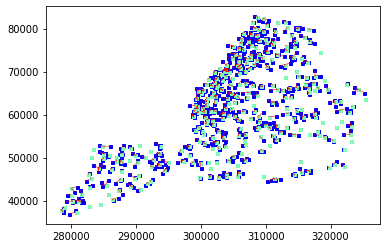

: 

: 

In [ ]:
# 画所有点及标注需求
markersize=3
linewidth=0.5
for i in N:
    xy=demandCoordinates[i]
    plt.plot(xy[0],xy[1],c="b",marker="s",markersize=markersize)
    #plt.text(xy[0],xy[1],f"{q[i]}")

# 画需求量
for i in N:
    if (n[i].x>0):
        xy=demandCoordinates[i]
        col=plt.cm.rainbow
        nMax=0.0
        for ni in N:
            # print(type(n[ni].x),n[ni].x,type(nMax))
            if n[ni].x>nMax:
                nMax=n[ni].x
        norm=color.Normalize(vmax=round(nMax)+1,vmin=0)
        plt.plot(xy[0],xy[1],marker="s",color=col(norm(n[i].x)),markersize=markersize)
        # plt.text(xy[0]-5,xy[1]-5,f"{n[i].x}",color="b")
        

# 画供应线
for i,j in A:
    if x[i,j].x>0.0:
        demandCoordinates[i][0],demandCoordinates[i][1]
        demandCoordinates[j][0],demandCoordinates[j][1]
        plt.plot([demandCoordinates[i][0],demandCoordinates[j][0]],[demandCoordinates[i][1],demandCoordinates[j][1]],color="r",linewidth=linewidth)
    

In [ ]:
for i in N:
    print(round(n[i].x),end=",")

0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,

: 

: 

In [ ]:
print(n[1].x)

1.0


: 

: 

In [ ]:
np.save()

: 

: 